In [2]:
# Import necessary libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [3]:
# Load the dataset
df = pd.read_csv('/data/CSE_435_Dataset.csv')


In [4]:
df.columns= ['Reading_hours', 'Sleep_hours','Entertainment_hours','Exercise_hours', 'Social_media_hours',
              'Mobile_phone_hours', 'Class_note_taking', 'Study_hours', 'Meal_Preparation_Hours', 'Part_Time_Work_Hours',
             'Weekday_Study_Group', 'Weekend_activities', 'Stress_Level', 'Self_assessment', 'Study_environment',
             'Daily_Planning', 'Health_condition', 'Procrastination_hour', 'CGPA']

In [5]:
df.columns

Index(['Reading_hours', 'Sleep_hours', 'Entertainment_hours', 'Exercise_hours',
       'Social_media_hours', 'Mobile_phone_hours', 'Class_note_taking',
       'Study_hours', 'Meal_Preparation_Hours', 'Part_Time_Work_Hours',
       'Weekday_Study_Group', 'Weekend_activities', 'Stress_Level',
       'Self_assessment', 'Study_environment', 'Daily_Planning',
       'Health_condition', 'Procrastination_hour', 'CGPA'],
      dtype='object')

In [6]:
df.head()

,Reading_hours,Sleep_hours,Entertainment_hours,Exercise_hours,Social_media_hours,Mobile_phone_hours,Class_note_taking,Study_hours,Meal_Preparation_Hours,Part_Time_Work_Hours,Weekday_Study_Group,Weekend_activities,Stress_Level,Self_assessment,Study_environment,Daily_Planning,Health_condition,Procrastination_hour,CGPA
0,4,8,2.5,1,4,4,Frequently,6,2,5,Yes,Outing,4,7,Noisy,False,Good,1,3.75
1,4,6-7,1,30 minit,1,1,Sometimes,4,1,4,Yes,sometime,5,5,Organized,True,Excellent,1,3.08
2,4,7,1,2,1,2,Frequently,4,2,0.5,Yes,"Badminton, Travel, Movies, and Games",5,8,Organized,True,Good,0.5,3.76
3,6,6.5,No,1.5,1.5,2,Always,3.5,3,NaN,No,social work,7,8,Organized,True,Excellent,0.3,3.35
4,2,5,NaN,0.5,2,3,Sometimes,NaN,NaN,NaN,No,cycling,1,5,Quiet,True,Good,0.5,2.78


In [7]:
selected_attributes = ['Study_hours', 'Part_Time_Work_Hours', 'Reading_hours', 'Sleep_hours',
                       'Social_media_hours', 'CGPA']

target_class = 'CGPA'

In [8]:
# ii. Make the target class into 4 categorical values
bins = [0, 2, 2.25, 2.99, 4]
labels = ['Fail', 'Third class', 'Second class', 'First class']
df[target_class] = pd.cut(df[target_class], bins=bins, labels=labels)

In [9]:
df['CGPA']

0      First class
1      First class
2      First class
3      First class
4     Second class
5      First class
6      First class
7      First class
8      First class
9     Second class
10    Second class
11    Second class
12     First class
13     First class
14     First class
15    Second class
16    Second class
17    Second class
18     First class
19     First class
20     First class
21     First class
22     First class
23     First class
24     First class
25     First class
26    Second class
27    Second class
28     First class
29    Second class
30    Second class
31     First class
32     First class
33     First class
34     First class
35    Second class
36     First class
37     First class
38     First class
39    Second class
40    Second class
41     First class
42     First class
Name: CGPA, dtype: category
Categories (4, object): ['Fail' < 'Third class' < 'Second class' < 'First class']

In [10]:
df['CGPA'].value_counts()

First class     29
Second class    14
Fail             0
Third class      0
Name: CGPA, dtype: int64

In [11]:
df[selected_attributes].isnull()

,Study_hours,Part_Time_Work_Hours,Reading_hours,Sleep_hours,Social_media_hours,CGPA
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,True,False,False,False,False
4,True,True,False,False,False,False
5,False,False,False,False,False,False
6,False,True,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [12]:
df[selected_attributes].isnull().sum()

Study_hours              3
Part_Time_Work_Hours    10
Reading_hours            0
Sleep_hours              0
Social_media_hours       0
CGPA                     0
dtype: int64

<ipython-input-13-b874e109f562>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


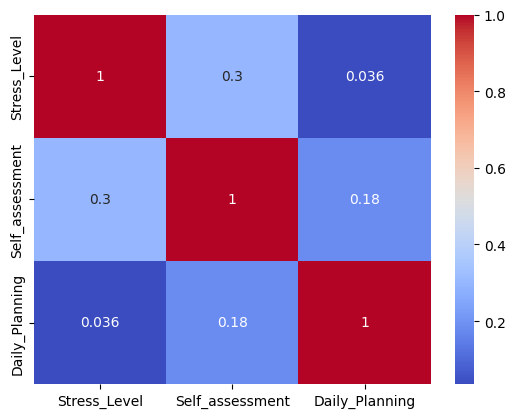

In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [14]:
df[selected_attributes]

,Study_hours,Part_Time_Work_Hours,Reading_hours,Sleep_hours,Social_media_hours,CGPA
0,6,5,4,8,4,First class
1,4,4,4,6-7,1,First class
2,4,0.5,4,7,1,First class
3,3.5,NaN,6,6.5,1.5,First class
4,NaN,NaN,2,5,2,Second class
5,4,6,3,6,2,First class
6,8,NaN,2,8,4,First class
7,3,8,4,8,2,First class
8,1,12,2,5,1,First class
9,30mint,10mint motivation speech,1,7,1,Second class


In [15]:

# Assuming df is your DataFrame
df['Reading_hours'] = df['Reading_hours'].apply(lambda x: re.findall(r'\d+\.\d+|\d+', str(x))[0] if re.findall(r'\d+\.\d+|\d+', str(x)) else None)

# Convert the column to numeric
df['Reading_hours'] = pd.to_numeric(df['Reading_hours'], errors='coerce')

In [16]:
# Assuming df is your DataFrame
df['Sleep_hours'] = df['Sleep_hours'].apply(lambda x: re.findall(r'\d+\.\d+|\d+', str(x))[0] if re.findall(r'\d+\.\d+|\d+', str(x)) else None)

# Convert the column to numeric
df['Sleep_hours'] = pd.to_numeric(df['Sleep_hours'], errors='coerce')

In [17]:
# Assuming df is your DataFrame
df['Social_media_hours'] = df['Social_media_hours'].apply(lambda x: re.findall(r'\d+\.\d+|\d+', str(x))[0] if re.findall(r'\d+\.\d+|\d+', str(x)) else None)

# Convert the column to numeric
df['Social_media_hours'] = pd.to_numeric(df['Social_media_hours'], errors='coerce')

In [18]:
# Assuming df is your DataFrame
df['Part_Time_Work_Hours'] = df['Part_Time_Work_Hours'].apply(lambda x: re.findall(r'\d+\.\d+|\d+', str(x))[0] if re.findall(r'\d+\.\d+|\d+', str(x)) else None)

# Convert the column to numeric
df['Part_Time_Work_Hours'] = pd.to_numeric(df['Part_Time_Work_Hours'], errors='coerce')

In [19]:

# Assuming df is your DataFrame
df['Study_hours'] = df['Study_hours'].apply(lambda x: re.findall(r'\d+\.\d+|\d+', str(x))[0] if re.findall(r'\d+\.\d+|\d+', str(x)) else None)

# Convert the column to numeric
df['Study_hours'] = pd.to_numeric(df['Study_hours'], errors='coerce')

In [20]:
df[selected_attributes]

,Study_hours,Part_Time_Work_Hours,Reading_hours,Sleep_hours,Social_media_hours,CGPA
0,6.0,5.0,4.0,8.0,4.0,First class
1,4.0,4.0,4.0,6.0,1.0,First class
2,4.0,0.5,4.0,7.0,1.0,First class
3,3.5,NaN,6.0,6.5,1.5,First class
4,NaN,NaN,2.0,5.0,2.0,Second class
5,4.0,6.0,3.0,6.0,2.0,First class
6,8.0,NaN,2.0,8.0,4.0,First class
7,3.0,8.0,4.0,8.0,2.0,First class
8,1.0,12.0,2.0,5.0,1.0,First class
9,30.0,10.0,1.0,7.0,1.0,Second class


In [21]:
df[selected_attributes].isnull().sum()

Study_hours              5
Part_Time_Work_Hours    13
Reading_hours            0
Sleep_hours              0
Social_media_hours       1
CGPA                     0
dtype: int64

In [22]:
mean_social_media_hours = df['Social_media_hours'].mean()
df['Social_media_hours'].fillna(mean_social_media_hours, inplace=True)

In [23]:
mean_part_time_work_hours= df['Part_Time_Work_Hours'].mean()
df['Part_Time_Work_Hours'].fillna(mean_part_time_work_hours, inplace=True)

In [24]:
mean_study_hours= df['Study_hours'].mean()
df['Study_hours'].fillna(mean_study_hours, inplace=True)

In [25]:
df[selected_attributes]

,Study_hours,Part_Time_Work_Hours,Reading_hours,Sleep_hours,Social_media_hours,CGPA
0,6.000000,5.00,4.0,8.0,4.000000,First class
1,4.000000,4.00,4.0,6.0,1.000000,First class
2,4.000000,0.50,4.0,7.0,1.000000,First class
3,3.500000,7.15,6.0,6.5,1.500000,First class
4,4.355263,7.15,2.0,5.0,2.000000,Second class
5,4.000000,6.00,3.0,6.0,2.000000,First class
6,8.000000,7.15,2.0,8.0,4.000000,First class
7,3.000000,8.00,4.0,8.0,2.000000,First class
8,1.000000,12.00,2.0,5.0,1.000000,First class
9,30.000000,10.00,1.0,7.0,1.000000,Second class


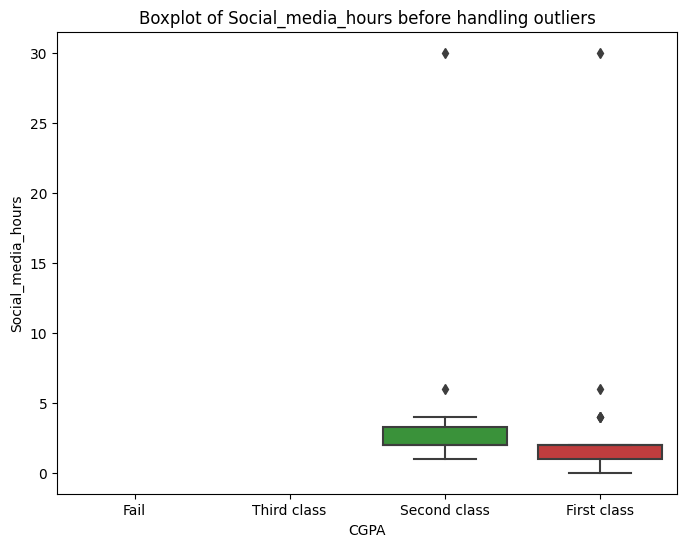

In [26]:
# Display boxplot before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='CGPA', y='Social_media_hours', data=df)
plt.title('Boxplot of Social_media_hours before handling outliers')
plt.show()


In [27]:
# Calculate Z-scores
z_scores = zscore(df['Social_media_hours'])
# Set a threshold for identifying outliers
threshold_social_media = 2
high_values = df[df['Social_media_hours'] > threshold_social_media]
# Identify and handle outliers
outliers = np.abs(z_scores) > threshold_social_media
df['Social_media_hours'][outliers] = df['Social_media_hours'].median()  # Replace outliers with the median



<ipython-input-27-412afd6c9049>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Social_media_hours'][outliers] = df['Social_media_hours'].median()  # Replace outliers with the median


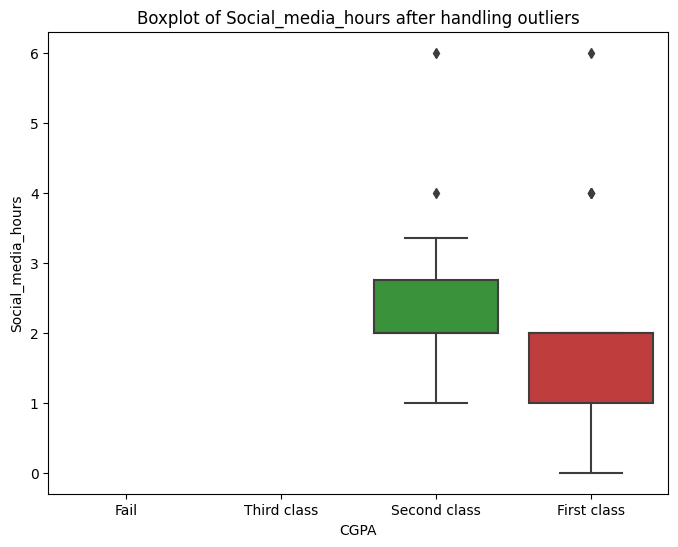

In [28]:
# Display boxplot after handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='CGPA', y='Social_media_hours', data=df)
plt.title('Boxplot of Social_media_hours after handling outliers')
plt.show()

In [29]:
df[selected_attributes]

,Study_hours,Part_Time_Work_Hours,Reading_hours,Sleep_hours,Social_media_hours,CGPA
0,6.000000,5.00,4.0,8.0,4.000000,First class
1,4.000000,4.00,4.0,6.0,1.000000,First class
2,4.000000,0.50,4.0,7.0,1.000000,First class
3,3.500000,7.15,6.0,6.5,1.500000,First class
4,4.355263,7.15,2.0,5.0,2.000000,Second class
5,4.000000,6.00,3.0,6.0,2.000000,First class
6,8.000000,7.15,2.0,8.0,4.000000,First class
7,3.000000,8.00,4.0,8.0,2.000000,First class
8,1.000000,12.00,2.0,5.0,1.000000,First class
9,30.000000,10.00,1.0,7.0,1.000000,Second class


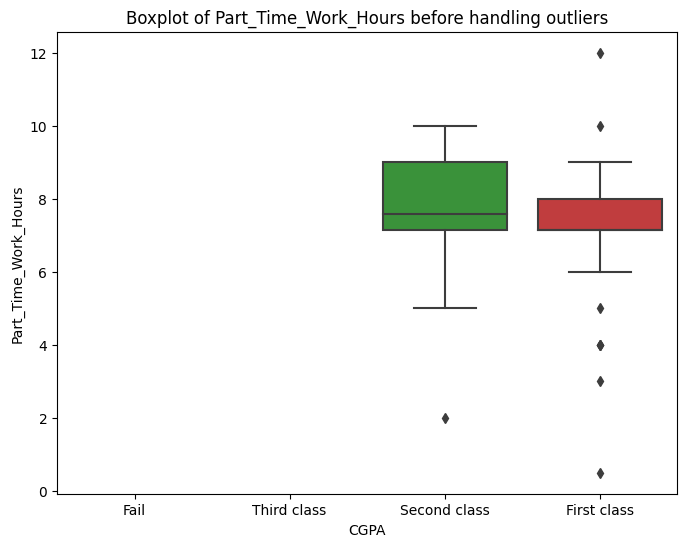

In [30]:
# Display boxplot before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='CGPA', y='Part_Time_Work_Hours', data=df)
plt.title('Boxplot of Part_Time_Work_Hours before handling outliers')
plt.show()


In [31]:
# Calculate Z-scores
z_scores_part_time_work = zscore(df['Part_Time_Work_Hours'])

# Set a threshold for identifying outliers
threshold_part_time_work_hours = 8

# Identify and handle outliers
outliers = np.abs(z_scores_part_time_work) > threshold_part_time_work_hours

print("Values to be replaced:", df['Part_Time_Work_Hours'][outliers])

df['Part_Time_Work_Hours'][outliers] = df['Part_Time_Work_Hours'].median()  # Replace outliers with the median






Values to be replaced: Series([], Name: Part_Time_Work_Hours, dtype: float64)


<ipython-input-31-30172e494db6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Part_Time_Work_Hours'][outliers] = df['Part_Time_Work_Hours'].median()  # Replace outliers with the median


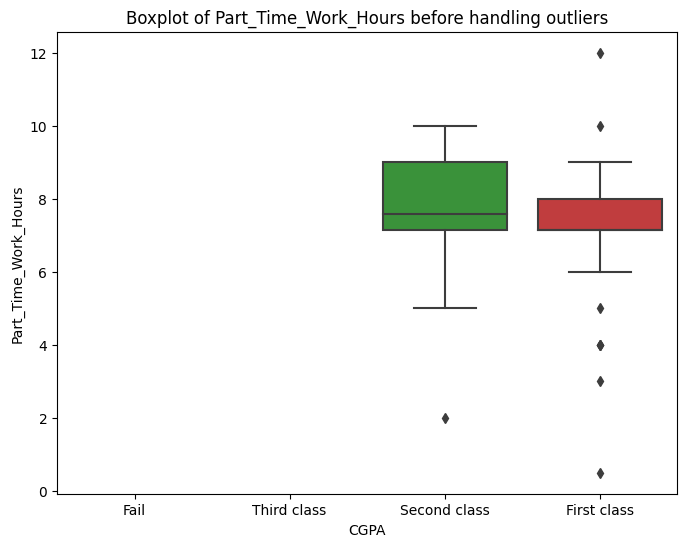

In [32]:
# Display boxplot before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='CGPA', y='Part_Time_Work_Hours', data=df)
plt.title('Boxplot of Part_Time_Work_Hours before handling outliers')
plt.show()

In [33]:
df[selected_attributes]

,Study_hours,Part_Time_Work_Hours,Reading_hours,Sleep_hours,Social_media_hours,CGPA
0,6.000000,5.00,4.0,8.0,4.000000,First class
1,4.000000,4.00,4.0,6.0,1.000000,First class
2,4.000000,0.50,4.0,7.0,1.000000,First class
3,3.500000,7.15,6.0,6.5,1.500000,First class
4,4.355263,7.15,2.0,5.0,2.000000,Second class
5,4.000000,6.00,3.0,6.0,2.000000,First class
6,8.000000,7.15,2.0,8.0,4.000000,First class
7,3.000000,8.00,4.0,8.0,2.000000,First class
8,1.000000,12.00,2.0,5.0,1.000000,First class
9,30.000000,10.00,1.0,7.0,1.000000,Second class


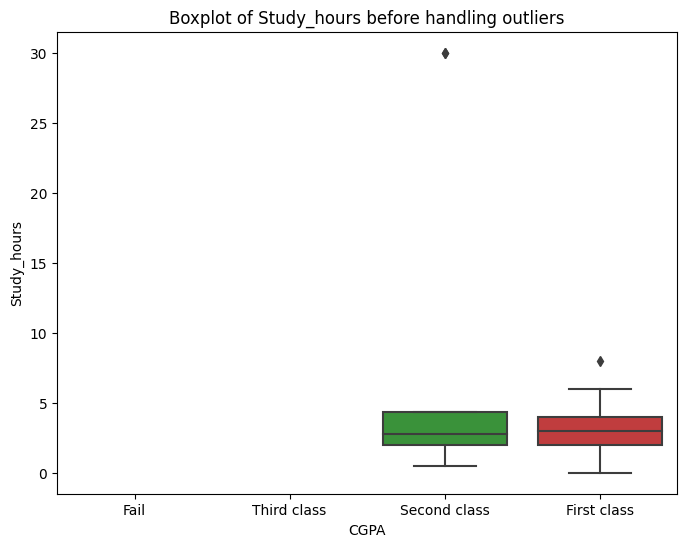

In [ ]:
# Display boxplot before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='CGPA', y='Study_hours', data=df)
plt.title('Boxplot of Study_hours before handling outliers')
plt.show()


In [ ]:


# Calculate Z-scores
z_scores_study_hours = zscore(df['Study_hours'])

# Set a threshold for identifying outliers
threshold_study_hours = 0

# Identify and handle outliers
outliers = np.abs(z_scores_study_hours) > threshold_study_hours
df['Study_hours'][outliers] = df['Study_hours'].median()  # Replace outliers with the median


<ipython-input-982-112bdd9a0cbb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Study_hours'][outliers] = df['Study_hours'].median()  # Replace outliers with the median


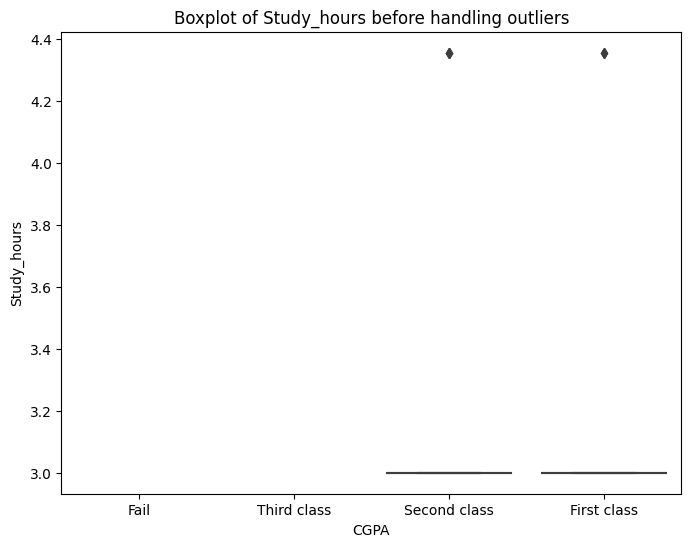

In [ ]:
# Display boxplot before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='CGPA', y='Study_hours', data=df)
plt.title('Boxplot of Study_hours before handling outliers')
plt.show()

In [ ]:
df[selected_attributes]

,Study_hours,Part_Time_Work_Hours,Reading_hours,Sleep_hours,Social_media_hours,CGPA
0,3.000000,7.15,4.0,8.0,4.000000,First class
1,3.000000,7.15,4.0,6.0,1.000000,First class
2,3.000000,7.15,4.0,7.0,1.000000,First class
3,3.000000,7.15,6.0,6.5,1.500000,First class
4,4.355263,7.15,2.0,5.0,2.000000,Second class
5,3.000000,7.15,3.0,6.0,2.000000,First class
6,3.000000,7.15,2.0,8.0,4.000000,First class
7,3.000000,8.00,4.0,8.0,2.000000,First class
8,3.000000,7.15,2.0,5.0,1.000000,First class
9,3.000000,7.15,1.0,7.0,1.000000,Second class


In [ ]:
# Assuming df is your DataFrame
cgpa_mapping = {'Fail': 0, 'Third class': 1, 'Second class': 2, 'First class': 3}

df['CGPA'] = df['CGPA'].map(cgpa_mapping)

In [ ]:
df[selected_attributes].isnull().sum()

Study_hours             0
Part_Time_Work_Hours    0
Reading_hours           0
Sleep_hours             0
Social_media_hours      0
CGPA                    0
dtype: int64

In [ ]:
df[selected_attributes].isnull().sum()

Study_hours             0
Part_Time_Work_Hours    0
Reading_hours           0
Sleep_hours             0
Social_media_hours      0
CGPA                    0
dtype: int64

In [ ]:
df[selected_attributes]

,Study_hours,Part_Time_Work_Hours,Reading_hours,Sleep_hours,Social_media_hours,CGPA
0,3.000000,7.15,4.0,8.0,4.000000,3
1,3.000000,7.15,4.0,6.0,1.000000,3
2,3.000000,7.15,4.0,7.0,1.000000,3
3,3.000000,7.15,6.0,6.5,1.500000,3
4,4.355263,7.15,2.0,5.0,2.000000,2
5,3.000000,7.15,3.0,6.0,2.000000,3
6,3.000000,7.15,2.0,8.0,4.000000,3
7,3.000000,8.00,4.0,8.0,2.000000,3
8,3.000000,7.15,2.0,5.0,1.000000,3
9,3.000000,7.15,1.0,7.0,1.000000,2


In [ ]:
df['CGPA'].value_counts()

3    29
2    14
0     0
1     0
Name: CGPA, dtype: int64

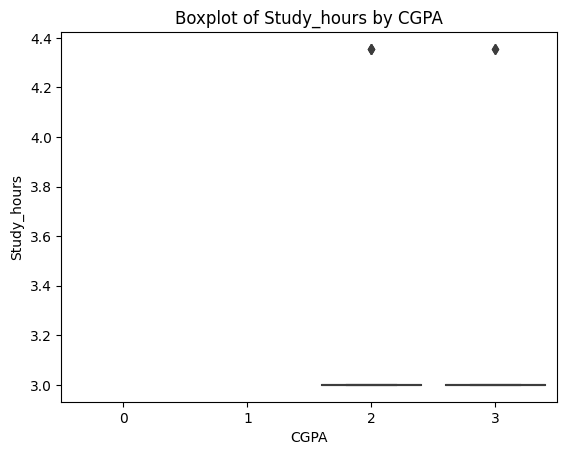

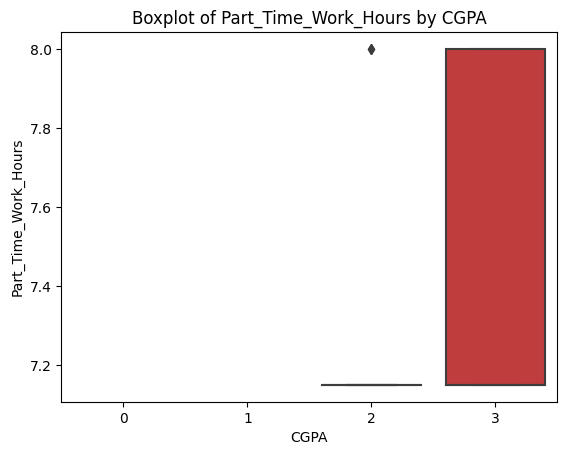

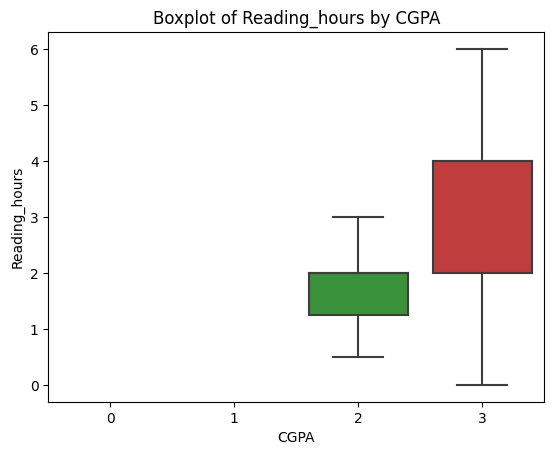

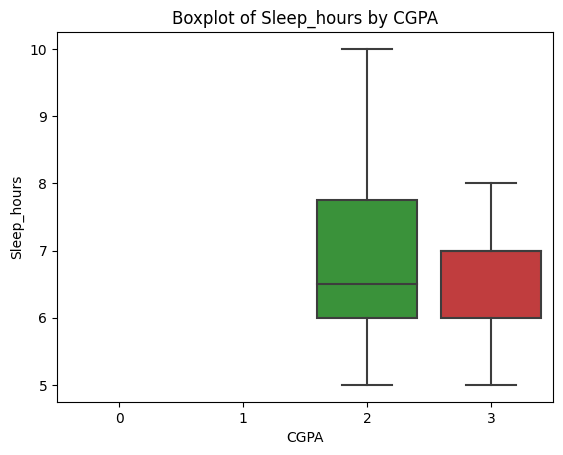

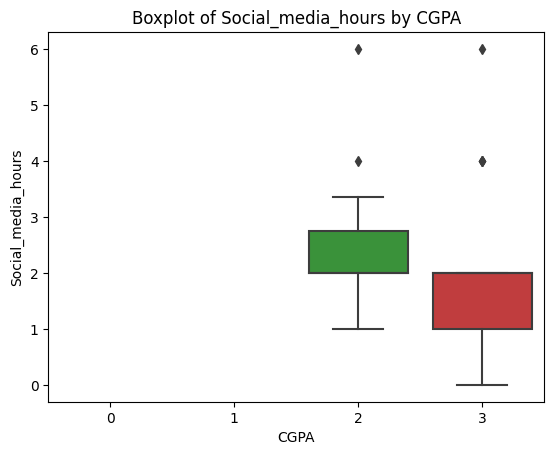

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [ ]:
# Show boxplot for each attribute
for column in selected_attributes:
    sns.boxplot(x=target_class, y=column, data=df)
    plt.title(f'Boxplot of {column} by CGPA')
    plt.show()


In [ ]:
print(df[target_class].unique())

[3, 2]
Categories (4, int64): [0 < 1 < 2 < 3]


In [ ]:
# v. Split the data into training and testing sets
X = df[selected_attributes[:-1]]
y = df['CGPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# vi. Use at least 3 classification models
from sklearn.tree import DecisionTreeClassifier
models = {
    #'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier()
}

In [ ]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}


In [ ]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)

# vii. Show a comparison table
results_df = pd.DataFrame(results)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.444444,0.518519,0.444444,0.478632
1,KNN,0.333333,0.466667,0.333333,0.388889
2,Neural Network,0.555556,0.555556,0.555556,0.555556
